## Regression vs. Classification

What I will be exploring: Since I noticed a very slight correlation between Pay and BILL AMT, I want to see how to explore these using the algorithms below. Below I have renamed the variables PAY to Status and Bill Amt to BillState since it was much easier for me to understand from a high level how these variables interact with one another. 

In [1]:
#imports
#nunpy, pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline

#cross validation
#initially did #from sklearn.cross_validation import train_test_split and did not work since it moved to another library
from sklearn.model_selection import train_test_split

In [2]:
#import clean pre-processed data
#The following data does contain dummies whereas my other did not
#index_col=[0] seeks to skip over the unwanted column that df supplies
rawData = pd.read_csv('creditone_new.csv', index_col=[0])
rawData.head()

,Limit Balance,Marriage,Age,Pay 0,Pay 2,Pay 3,Pay 4,Pay 5,Pay 6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default,Default Payment Next Month_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [3]:
df = rawData

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Limit Balance                           30000 non-null  int64
 1   Marriage                                30000 non-null  int64
 2   Age                                     30000 non-null  int64
 3   Pay 0                                   30000 non-null  int64
 4   Pay 2                                   30000 non-null  int64
 5   Pay 3                                   30000 non-null  int64
 6   Pay 4                                   30000 non-null  int64
 7   Pay 5                                   30000 non-null  int64
 8   Pay 6                                   30000 non-null  int64
 9   BILL_AMT1                               30000 non-null  int64
 10  BILL_AMT2                               30000 non-null  int64
 11  BILL_AMT3      

In [5]:
#Since it's so difficult to follow, I renamed columns so that things are easier for me to follow in this way
df.rename(columns={ 'Pay 0':'Status_Sept','Pay 2':'Status_Aug','Pay 3':'Status_Jul','Pay 4':'Status_Jun','Pay 5':'Status_May','Pay 6':'Status_April','BILL_AMT1':'Bill_StateSept','BILL_AMT2':'Bill_StateAug','BILL_AMT3':'Bill_StateJul','BILL_AMT4':'Bill_StateJun','BILL_AMT5':'Bill_StateMay','BILL_AMT6':'Bill_StateApril','PAY_AMT1':'Payment_Sept','PAY_AMT2':'Payment_Aug','PAY_AMT3': 'Payment_July','PAY_AMT4':'Payment_June','PAY_AMT5':'Payment_May','PAY_AMT6':'Payment_April'}, inplace=True)

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Limit Balance                           30000 non-null  int64
 1   Marriage                                30000 non-null  int64
 2   Age                                     30000 non-null  int64
 3   Status_Sept                             30000 non-null  int64
 4   Status_Aug                              30000 non-null  int64
 5   Status_Jul                              30000 non-null  int64
 6   Status_Jun                              30000 non-null  int64
 7   Status_May                              30000 non-null  int64
 8   Status_April                            30000 non-null  int64
 9   Bill_StateSept                          30000 non-null  int64
 10  Bill_StateAug                           30000 non-null  int64
 11  Bill_StateJul  

In [7]:
#confirm rename
rawData.head()

,Limit Balance,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,...,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default,Default Payment Next Month_not default
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1


In [8]:
##Correlation measures the strength of the relationship between each variable
#Correlation coefficients range between -1 and 1, numbers closer to -1 defining a strong negative corr
#Correlation coefficients closer to 1 show a strong positive correlation and numbers closer to 0 mean little to no cor
#Positive correltion between BILL_StateJuly and Bill_StateJun, Bill_StateMay, and Bill_StateApril and 
#Positive correltion between Status_Sept and Status_Aug, Status_Jul, Status_Jun, Status_May, Status_April
corrMat = rawData.corr()
print(corrMat)



                                        Limit Balance  Marriage       Age  \
Limit Balance                                1.000000 -0.108139  0.144713   
Marriage                                    -0.108139  1.000000 -0.414170   
Age                                          0.144713 -0.414170  1.000000   
Status_Sept                                 -0.271214  0.019917 -0.039447   
Status_Aug                                  -0.296382  0.024199 -0.050148   
Status_Jul                                  -0.286123  0.032688 -0.053048   
Status_Jun                                  -0.267460  0.033122 -0.049722   
Status_May                                  -0.249411  0.035629 -0.053826   
Status_April                                -0.235195  0.034345 -0.048773   
Bill_StateSept                               0.285430 -0.023472  0.056239   
Bill_StateAug                                0.278314 -0.021602  0.054283   
Bill_StateJul                                0.283236 -0.024909  0.053710   

## Selecting the Data


In [9]:
#features
#Identify how many columns exist by referencind the info function above. 
#Do not include your dependent (Limit Bal)
X = rawData.iloc[:,1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,Bill_StateAug,...,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default
1,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
2,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
3,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
4,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
5,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


## Limit balance as the depedent variable
Here I am splitting the data into 70% and testing 30% (test size=.30).

In [10]:
#dependent variable
#will select Default Payment Next Month_default first
y = rawData['Limit Balance']


In [11]:
#Validate correct column is being used for dependent
#dependent variable
print(y)

1         20000
2        120000
3         90000
4         50000
5         50000
          ...  
30199    220000
30200    150000
30201     30000
30202     80000
30203     50000
Name: Limit Balance, Length: 30000, dtype: int64


## Preparing each regression algorithm:

In [12]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [13]:
#To build and assess models we create an empty list to store the results with another
#Must hold the name of each algorithm so we can print
#regression
results = []
names = []

for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [14]:
#Output: 
for i in range(len(names)):
    print(names[i],results[i].mean())



Random Forest Regressor 0.4675714044588986
Linear Regression 0.3581989426610764
Support Vector Regression -0.050380094472762


## Training for Random Forest Regressor 


In [15]:
#Use model variable you est. in step 2
#pass training data as we did with test train splot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [16]:
#Choose the algorithm -- random forest regressor
rfr1 = RandomForestRegressor()
rfrFit1 =rfr1.fit(X_train,y_train)

In [17]:
#Here's the predictions
#The score cannot be right. I am sure of it. Will bin credit balance. 
rfrpreds = rfrFit1.predict(X_test)
predRsquared = r2_score(y_test, rfrpreds)
rmse = sqrt(mean_squared_error(y_test,rfrpreds))
print ('R Squared: %.3f'% predRsquared)
print ('RMSE: %.3f'%rmse)

R Squared: 0.468
RMSE: 93821.145


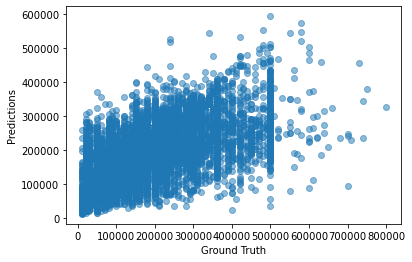

In [18]:
plt.scatter(y_test, rfrpreds, alpha= 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

## Experiment on how binning affects the predictions


In [19]:
#Binning limit balance 
rawData.describe()

,Limit Balance,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,...,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default,Default Payment Next Month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
#Discretizing credit limits
#The label parameter will ensure that the categorical data will return integers
rawData['limit_cut']=pd.qcut(rawData['Limit Balance'],q=4, labels=False)
print(rawData.groupby(['limit_cut'])['limit_cut'].count())

limit_cut
0    7676
1    7614
2    7643
3    7067
Name: limit_cut, dtype: int64


In [21]:
rawData['limit_cut'].head()

1    0
2    1
3    1
4    0
5    0
Name: limit_cut, dtype: int64

In [22]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Limit Balance                           30000 non-null  int64
 1   Marriage                                30000 non-null  int64
 2   Age                                     30000 non-null  int64
 3   Status_Sept                             30000 non-null  int64
 4   Status_Aug                              30000 non-null  int64
 5   Status_Jul                              30000 non-null  int64
 6   Status_Jun                              30000 non-null  int64
 7   Status_May                              30000 non-null  int64
 8   Status_April                            30000 non-null  int64
 9   Bill_StateSept                          30000 non-null  int64
 10  Bill_StateAug                           30000 non-null  int64
 11  Bill_StateJul  

## Training for Random Forest Regressor after binning


In [23]:
#dependent variable
#will select Default Payment Next Month_default first
y = rawData['Limit Balance']

In [24]:
#Use model variable you est. in step 2
#pass training data as we did with test train splot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [25]:
#Choose the algorithm -- random forest regressor
rfr2 = RandomForestRegressor()
rfrFit2 =rfr2.fit(X_train,y_train)

In [26]:
#Here's the prediction 
#It is the same as above. Why? Must change the variable to limit_cut in order for it to have an effect.
rfrpreds2 = rfrFit2.predict(X_test)
predRsquared2 = r2_score(y_test, rfrpreds2)
rmse2 = sqrt(mean_squared_error(y_test,rfrpreds2))
print ('R Squared: %.3f'% predRsquared2)
print ('RMSE: %.3f'%rmse2)

R Squared: 0.469
RMSE: 93774.712


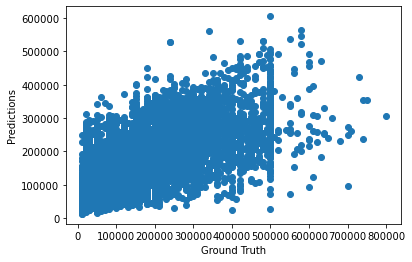

In [27]:
plt.scatter(y_test, rfrpreds2)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Training for Linear Regression


In [28]:
#Choose the algorithm
#Linear Regression
lr1 = LinearRegression ()
lrFit1 = lr1.fit(X_train,y_train)

In [29]:
#Provides the predictions for Linear Regression
lrpreds1 = lrFit1.predict(X_test)
predRsquared3 = r2_score(y_test, lrpreds1)
rmse3 = sqrt(mean_squared_error(y_test,lrpreds1))
print ('R Squared: %.3f'% predRsquared3)
print ('RMSE: %.3f'%rmse3)

R Squared: 0.360
RMSE: 102975.437


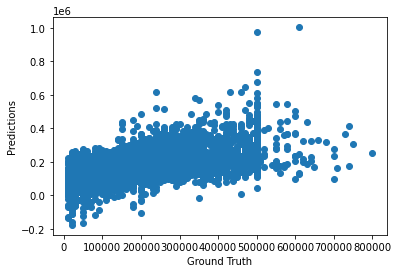

In [30]:
plt.scatter(y_test, lrpreds1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Training for Support Vector Regression 

In [31]:
#Choose the algorithm
svr1 = SVR ()
svrFit1 = svr1.fit(X_train,y_train)

In [32]:
#Provides the predictions for SVR
svrpreds1 = svrFit1.predict(X_test)
predRsquared4 = r2_score(y_test, svrpreds1)
rmse4 = sqrt(mean_squared_error(y_test,svrpreds1))
print ('R Squared: %.3f'% predRsquared4)
print ('RMSE: %.3f'%rmse4)

R Squared: -0.037
RMSE: 131045.067


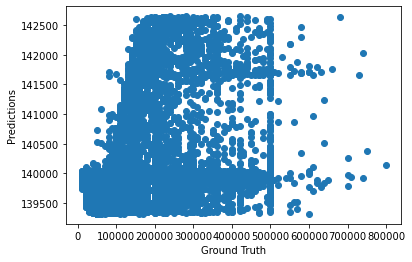

In [33]:
plt.scatter(y_test, svrpreds1)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## RMSE and R Squared
R SQUARED: It is the proportional improvement in prediction from the regression model, compared to the mean model. It indicates the goodness of fit of the model.
 
RMSE: Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

Read through this at greater depth and understand it. 


## limit_cut as the Dependent 
I want to use the binned limit balance as a dependent against the other variables. 


In [34]:
#Select the data
#features
#Identify how many columns exist by referencind the info function above. 
#Do not include your dependent ('limit_cut')
X = rawData.iloc[:,1:29]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,Bill_StateAug,...,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default,Default Payment Next Month_not default
1,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,1,0
2,2,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,1,0
3,2,34,0,0,0,0,0,0,29239,14027,...,1000,5000,1,0,0,0,0,1,0,1
4,1,37,0,0,0,0,0,0,46990,48233,...,1069,1000,1,0,0,0,0,1,0,1
5,1,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,1


In [35]:
#dependent variable
#Selecting the binned data
y = rawData['limit_cut']

In [36]:
#Validate correct column is being used for dependent
#dependent variable
print(y)

1        0
2        1
3        1
4        0
5        0
        ..
30199    2
30200    2
30201    0
30202    1
30203    0
Name: limit_cut, Length: 30000, dtype: int64


In [37]:
#Random Forest Regressor
rfr3 = RandomForestRegressor()
rfrFit3 =rfr3.fit(X_train,y_train)

In [38]:
#Here's the prediction 
#Variable had no bearing in changing the prediction
rfrpreds3 = rfrFit3.predict(X_test)
predRsquared4 = r2_score(y_test, rfrpreds3)
rmse4 = sqrt(mean_squared_error(y_test,rfrpreds3))
print ('R Squared: %.3f'% predRsquared4)
print ('RMSE: %.3f'%rmse4)

R Squared: 0.468
RMSE: 93858.478


In [39]:
#Linear Regression
lr2 = LinearRegression ()
lrFit2 = lr2.fit(X_train,y_train)

In [40]:
#Here's the prediction 
#No change to the overall score
lrpreds2 = lrFit2.predict(X_test)
predRsquared5 = r2_score(y_test, lrpreds2)
rmse5 = sqrt(mean_squared_error(y_test,lrpreds2))
print ('R Squared: %.3f'% predRsquared5)
print ('RMSE: %.3f'%rmse5)

R Squared: 0.360
RMSE: 102975.437


In [41]:
#Support Vector Regression
svr2 = SVR ()
svrFit2 = svr2.fit(X_train,y_train)

In [42]:
#Provides the predictions for SVR
#No difference from limit balance before binning
svrpreds2 = svrFit2.predict(X_test)
predRsquared6 = r2_score(y_test, svrpreds2)
rmse6 = sqrt(mean_squared_error(y_test,svrpreds2))
print ('R Squared: %.3f'% predRsquared6)
print ('RMSE: %.3f'%rmse6)

R Squared: -0.037
RMSE: 131045.067


## Default is the dependent


In [43]:
#Select the data:
X = rawData.iloc[:,0:27]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Limit Balance,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,...,Payment_July,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1


In [44]:
#dependent variable
#Selecting the binned data
y = rawData['Default Payment Next Month_default']

In [45]:
#Random Forest Regressor
rfr4 = RandomForestRegressor()
rfrFit4 =rfr4.fit(X_train,y_train)

# prediction
rfrpreds4 = rfrFit4.predict(X_test)
predRsquared7 = r2_score(y_test, rfrpreds4)
rmse7 = sqrt(mean_squared_error(y_test,rfrpreds4))
print ('R Squared: %.3f'% predRsquared7)
print ('RMSE: %.3f'%rmse7)

R Squared: 0.468
RMSE: 93885.927


## Classification Models

In [46]:
#Importing additional model metrics 
#SKLearn Stuff
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline


In [47]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [48]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [49]:
for i in range(len(names)):
    print(names[i],result[i].mean())

Random Forest Classifier 0.7159
Decision Tree Classifier 0.7246


## Using Random Forest Classifier and Decision Tree Classifier

In [50]:
#Choose the data
#Select the data:
X = rawData.iloc[:,1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,Bill_StateAug,...,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default
1,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
2,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
3,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
4,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
5,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [51]:
#dependent variable
y = rawData['Limit Balance']

In [52]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [53]:
#Modeling (Classification)
#max depth with 3-5 was best 
dtc1 = DecisionTreeClassifier(max_depth=5)
dtcFit1 = dtc1.fit(X_train,y_train)

In [54]:
#Predictions
#Accuracy is awful. Will change dependent to binned data.
dtc1pred = dtcFit1.predict(X_test)
print(classification_report(y_test, dtc1pred))

              precision    recall  f1-score   support

       10000       0.12      0.83      0.22       125
       16000       0.00      0.00      0.00         1
       20000       0.43      0.59      0.50       620
       30000       0.35      0.50      0.41       467
       40000       0.00      0.00      0.00        85
       50000       0.49      0.54      0.52      1003
       60000       0.32      0.34      0.33       247
       70000       0.34      0.37      0.35       238
       80000       0.30      0.34      0.32       470
       90000       0.00      0.00      0.00       211
      100000       0.20      0.28      0.23       302
      110000       0.26      0.30      0.27       169
      120000       0.16      0.13      0.14       200
      130000       0.00      0.00      0.00       222
      140000       0.23      0.23      0.23       193
      150000       0.00      0.00      0.00       345
      160000       0.00      0.00      0.00       210
      170000       0.00    

/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
#Choose the data
X = rawData.iloc[:,1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,Bill_StateAug,...,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default
1,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
2,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
3,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
4,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
5,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [56]:
#dependent variable
#Selecting the binned data
y = rawData['limit_cut']

In [57]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [58]:
#Modeling (Classification)
#max depth with 3-5 was best 
dtc2 = DecisionTreeClassifier(max_depth=5)
dtcFit2 = dtc2.fit(X_train,y_train)

In [59]:
#Predictions
#Accuracy performed somewhat to 55% and precision at 64%
dtc2pred = dtcFit2.predict(X_test)
print(classification_report(y_test, dtc2pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



In [60]:
from sklearn.tree import plot_tree

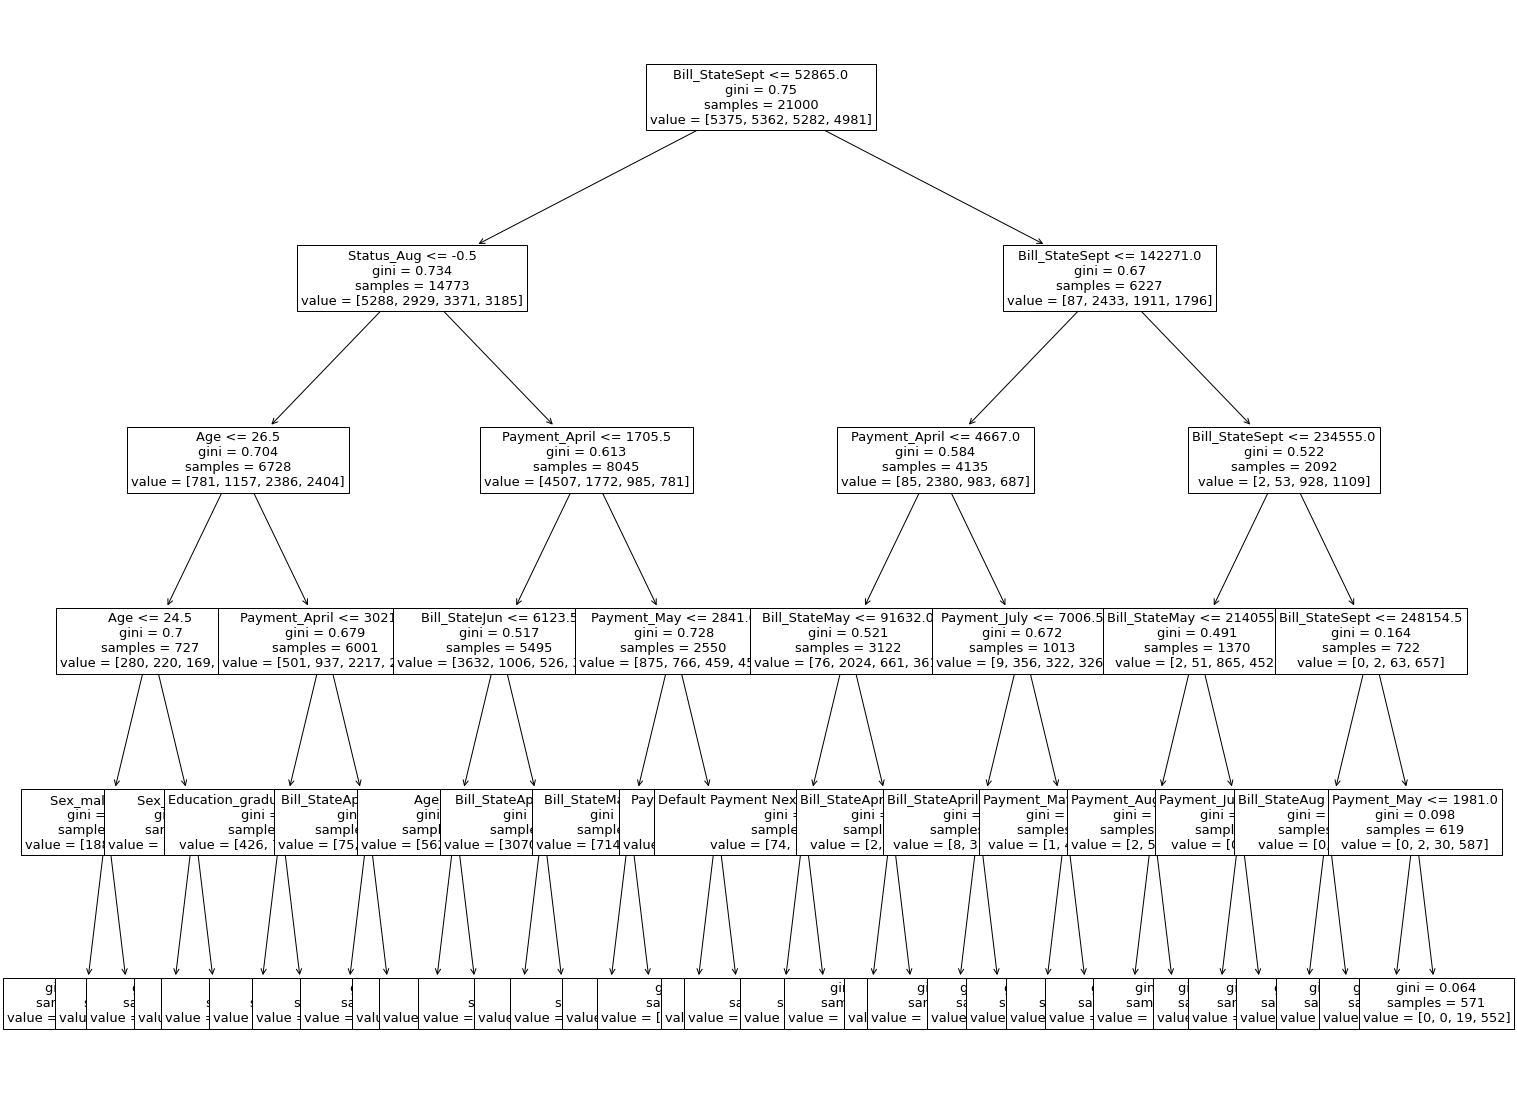

In [61]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc2, feature_names=X.columns, fontsize=13)

In [62]:
#Random Forest Classifier
#Accuracy was like the flip of a coin. Useless.
rfc1 = RandomForestClassifier(n_estimators=100)
rfcFit1 = rfc1.fit(X_train,y_train)

In [63]:
#Predictions
#Accuracy is awful 
rfc1preds = rfcFit1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,rfc1preds))

Accuracy: 0.5836666666666667


In [64]:
#Gradient Booster Classifier 
gbc1 = GradientBoostingClassifier(max_depth=5,
    n_estimators=3,
    learning_rate=1.0)
gbcFit1 = gbc1.fit(X_train,y_train)

In [65]:
#Predictions with Gradient Booster 
#Accuracy was not okay -- like the flip of a coin. Useless.
gbc1preds = gbcFit1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,gbc1preds))

Accuracy: 0.5685555555555556


## Changing the dependent 

In [66]:
#Choose the data
X = rawData.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Limit Balance,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,...,Payment_July,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,0,1
4,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,0,1
5,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1


In [67]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [68]:
#Decision Tree Classifier
dtc3 = DecisionTreeClassifier(max_depth=5)
dtcFit3 = dtc3.fit(X_train,y_train)

In [69]:
#Predictions
#Accuracy performed somewhat to 55% and precision at 64%
dtc3pred = dtcFit3.predict(X_test)
print(classification_report(y_test, dtc3pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



In [70]:
#Change features 
X = rawData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,Bill_StateAug,...,Payment_June,Payment_May,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,limit_cut
1,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,0
2,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
3,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,1
4,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
5,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [71]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [72]:
#Decision Tree Classifier
dtc4 = DecisionTreeClassifier(max_depth=5)
dtcFit4 = dtc4.fit(X_train,y_train)

In [73]:
#Predictions
dtc4pred = dtcFit4.predict(X_test)
print(classification_report(y_test, dtc4pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



In [74]:
#Random Forest Classifier
#Accuracy was like the flip of a coin. Useless.
rfc2 = RandomForestClassifier(n_estimators=100)
rfcFit2 = rfc2.fit(X_train,y_train)

In [75]:
#Predictions
rfc2preds = rfcFit2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,rfc2preds))

Accuracy: 0.5874444444444444


In [76]:
#Gradient Booster Classifier 
gbc2 = GradientBoostingClassifier(max_depth=5,
    n_estimators=3,
    learning_rate=1.0)
gbcFit2 = gbc2.fit(X_train,y_train)

In [77]:
#Predictions with Gradient Booster 
#Accuracy was not okay -- like the flip of a coin. Useless.
gbc2preds = gbcFit2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,gbc2preds))

Accuracy: 0.5683333333333334


In [78]:
#Changing the features
X = rawData.iloc[:,[3,4,5,6,7,8]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0


In [79]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [80]:
#Decision Tree Classifier
dtc4 = DecisionTreeClassifier(max_depth=5)
dtcFit4 = dtc4.fit(X_train,y_train)

In [81]:
#Predictions
#No changes
dtc4pred = dtcFit4.predict(X_test)
print(classification_report(y_test, dtc4pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



In [82]:
#Changing the features
X = rawData.iloc[:,[9,10,11,12,13,14]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Bill_StateSept,Bill_StateAug,Bill_StateJul,Bill_StateJun,Bill_StateMay,Bill_StateApril
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


In [83]:
#Decision Tree Classifier
dtc5 = DecisionTreeClassifier(max_depth=5)
dtcFit5 = dtc5.fit(X_train,y_train)

In [84]:
#Predictions
#No changes 
dtc5pred = dtcFit5.predict(X_test)
print(classification_report(y_test, dtc5pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



## Experiment on binning age

In [85]:
rawData.describe()

,Limit Balance,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Bill_StateSept,...,Payment_April,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default Payment Next Month_default,Default Payment Next Month_not default,limit_cut
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800,1.470033
std,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062,1.109959
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [86]:
#Discretizing age 
#The label parameter will ensure that the categorical data will return integers
rawData['age_cut']=pd.qcut(rawData['Age'],q=4, labels=False)
print(rawData.groupby(['age_cut'])['age_cut'].count())

age_cut
0    8013
1    7683
2    6854
3    7450
Name: age_cut, dtype: int64


In [87]:
#Confirm it appears in the 
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30203
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Limit Balance                           30000 non-null  int64
 1   Marriage                                30000 non-null  int64
 2   Age                                     30000 non-null  int64
 3   Status_Sept                             30000 non-null  int64
 4   Status_Aug                              30000 non-null  int64
 5   Status_Jul                              30000 non-null  int64
 6   Status_Jun                              30000 non-null  int64
 7   Status_May                              30000 non-null  int64
 8   Status_April                            30000 non-null  int64
 9   Bill_StateSept                          30000 non-null  int64
 10  Bill_StateAug                           30000 non-null  int64
 11  Bill_StateJul  

In [88]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_sept']=pd.qcut(rawData['Bill_StateSept'],q=4, labels=False)
print(rawData.groupby(['bill_sept'])['bill_sept'].count())

bill_sept
0    7500
1    7500
2    7500
3    7500
Name: bill_sept, dtype: int64


In [89]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_aug']=pd.qcut(rawData['Bill_StateAug'],q=4, labels=False)
print(rawData.groupby(['bill_aug'])['bill_aug'].count())

bill_aug
0    7500
1    7500
2    7500
3    7500
Name: bill_aug, dtype: int64


In [90]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_jul']=pd.qcut(rawData['Bill_StateJul'],q=4, labels=False)
print(rawData.groupby(['bill_jul'])['bill_jul'].count())

bill_jul
0    7500
1    7500
2    7500
3    7500
Name: bill_jul, dtype: int64


In [91]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_jun']=pd.qcut(rawData['Bill_StateJun'],q=4, labels=False)
print(rawData.groupby(['bill_jun'])['bill_jun'].count())

bill_jun
0    7500
1    7502
2    7498
3    7500
Name: bill_jun, dtype: int64


In [92]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_may']=pd.qcut(rawData['Bill_StateMay'],q=4, labels=False)
print(rawData.groupby(['bill_may'])['bill_may'].count())

bill_may
0    7501
1    7499
2    7500
3    7500
Name: bill_may, dtype: int64


In [93]:
#Discretizing Bill Statement
#The label parameter will ensure that the categorical data will return integers
rawData['bill_april']=pd.qcut(rawData['Bill_StateApril'],q=4, labels=False)
print(rawData.groupby(['bill_april'])['bill_april'].count())

bill_april
0    7502
1    7498
2    7500
3    7500
Name: bill_april, dtype: int64


In [94]:
#Changing the features
X = rawData.iloc[:,[1,2,3,4,5,6,7,8,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34,36,36]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_April,Payment_Sept,Payment_Aug,...,Education_other,Education_university,limit_cut,age_cut,bill_sept,bill_aug,bill_jul,bill_jun,bill_april,bill_april
1,1,24,2,2,-1,-1,-2,-2,0,689,...,0,1,0,0,1,1,0,0,0,0
2,2,26,-1,2,0,0,0,2,0,1000,...,0,1,1,0,0,0,1,1,1,1
3,2,34,0,0,0,0,0,0,1518,1500,...,0,1,1,1,2,1,1,1,1,1
4,1,37,0,0,0,0,0,0,2000,2019,...,0,1,0,2,2,2,2,2,2,2
5,1,57,-1,0,-1,0,0,0,2000,36681,...,0,1,0,3,1,1,2,2,2,2


In [95]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [100]:
#Decision Tree Classifier
dtc6 = DecisionTreeClassifier(max_depth=5)
dtcFit6 = dtc6.fit(X_train,y_train)

In [101]:
#Predictions
#No changes 
dtc6pred = dtcFit6.predict(X_test)
print(classification_report(y_test, dtc6pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2301
           1       0.52      0.58      0.55      2252
           2       0.44      0.49      0.47      2361
           3       0.62      0.34      0.44      2086

    accuracy                           0.55      9000
   macro avg       0.55      0.54      0.54      9000
weighted avg       0.55      0.55      0.54      9000



In [138]:
#Changing the features
X = rawData.iloc[:,[3,4,5,26,29,30,31]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Status_Sept,Status_Aug,Status_Jul,Education_university,limit_cut,age_cut,bill_sept
1,2,2,-1,1,0,0,1
2,-1,2,0,1,1,0,0
3,0,0,0,1,1,1,2
4,0,0,0,1,0,2,2
5,-1,0,-1,1,0,3,1


In [139]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [140]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [178]:
#Decision Tree Classifier
dtc7 = DecisionTreeClassifier(max_depth=3)
dtcFit7 = dtc7.fit(X_train,y_train)

In [179]:
#Predictions
dtc7pred = dtcFit7.predict(X_test)
print(classification_report(y_test, dtc7pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7052
           1       0.70      0.33      0.44      1948

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.81      0.82      0.80      9000



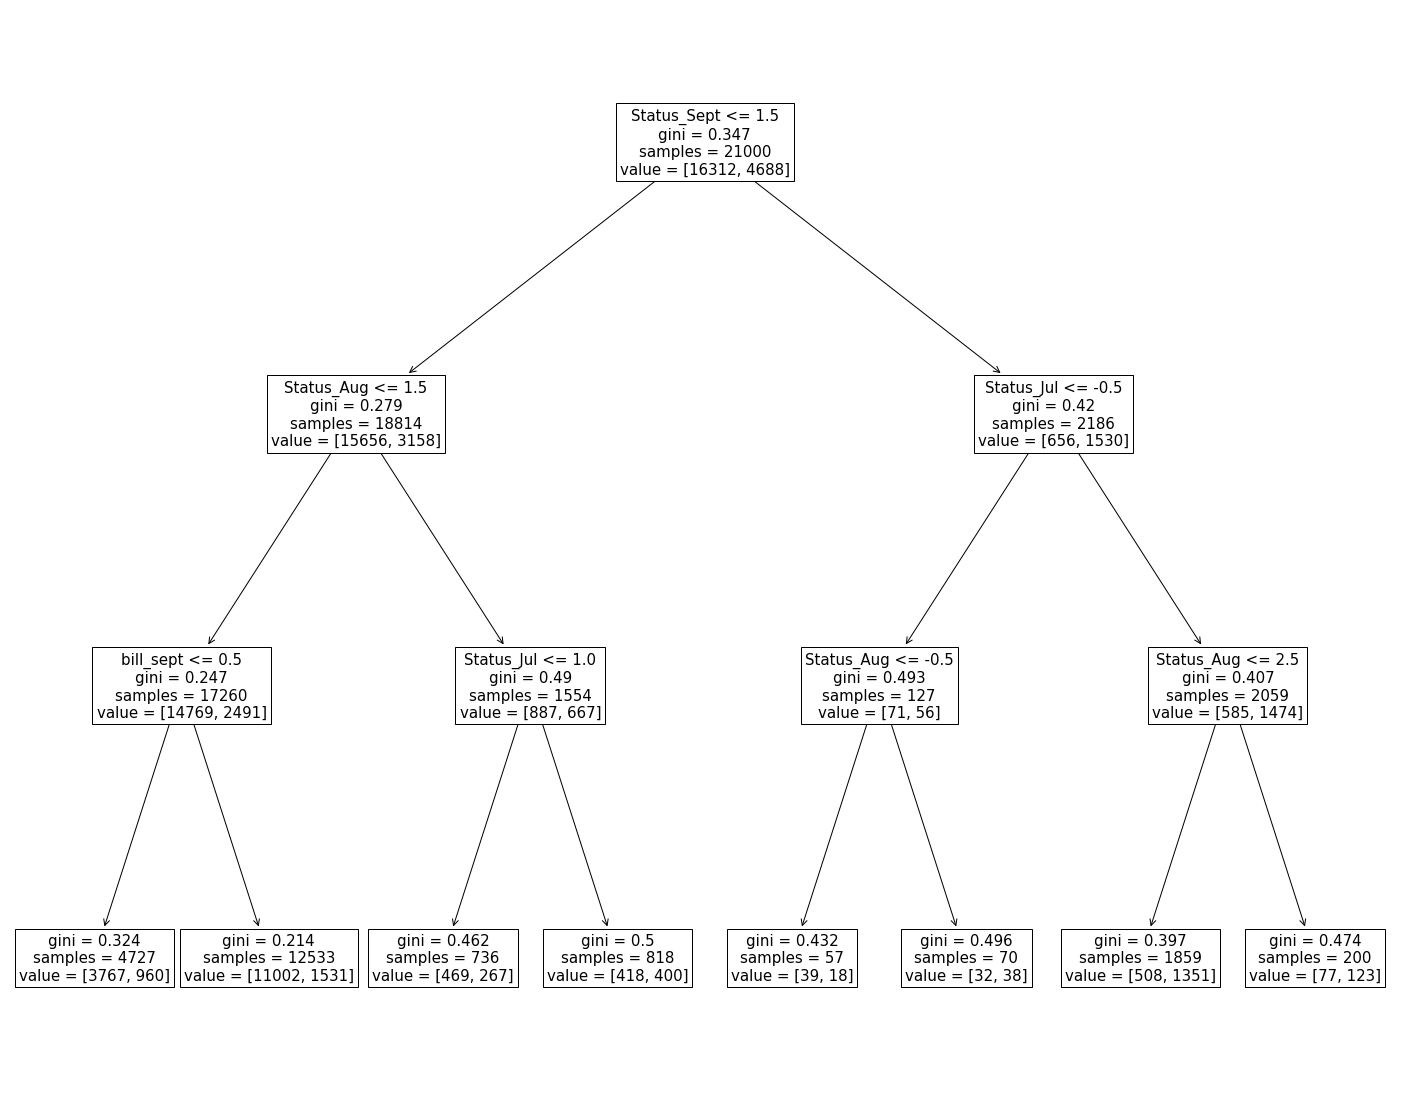

In [181]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc7, feature_names=X.columns, fontsize=15)

In [147]:
#Changing the features
X = rawData.iloc[:,[3,4,5,26,29,30,31,32,33,34,35,36]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Status_Sept,Status_Aug,Status_Jul,Education_university,limit_cut,age_cut,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_april
1,2,2,-1,1,0,0,1,1,0,0,0,0
2,-1,2,0,1,1,0,0,0,1,1,1,1
3,0,0,0,1,1,1,2,1,1,1,1,1
4,0,0,0,1,0,2,2,2,2,2,2,2
5,-1,0,-1,1,0,3,1,1,2,2,2,2


In [148]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [149]:
#dependent variable
y = rawData['Default Payment Next Month_default']

In [182]:
#Decision Tree Classifier
dtc8 = DecisionTreeClassifier(max_depth=3)
dtcFit8 = dtc8.fit(X_train,y_train)

In [183]:
#Predictions
dtc8pred = dtcFit8.predict(X_test)
print(classification_report(y_test, dtc8pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7052
           1       0.70      0.33      0.44      1948

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.81      0.82      0.80      9000



In [184]:
from sklearn.tree import plot_tree

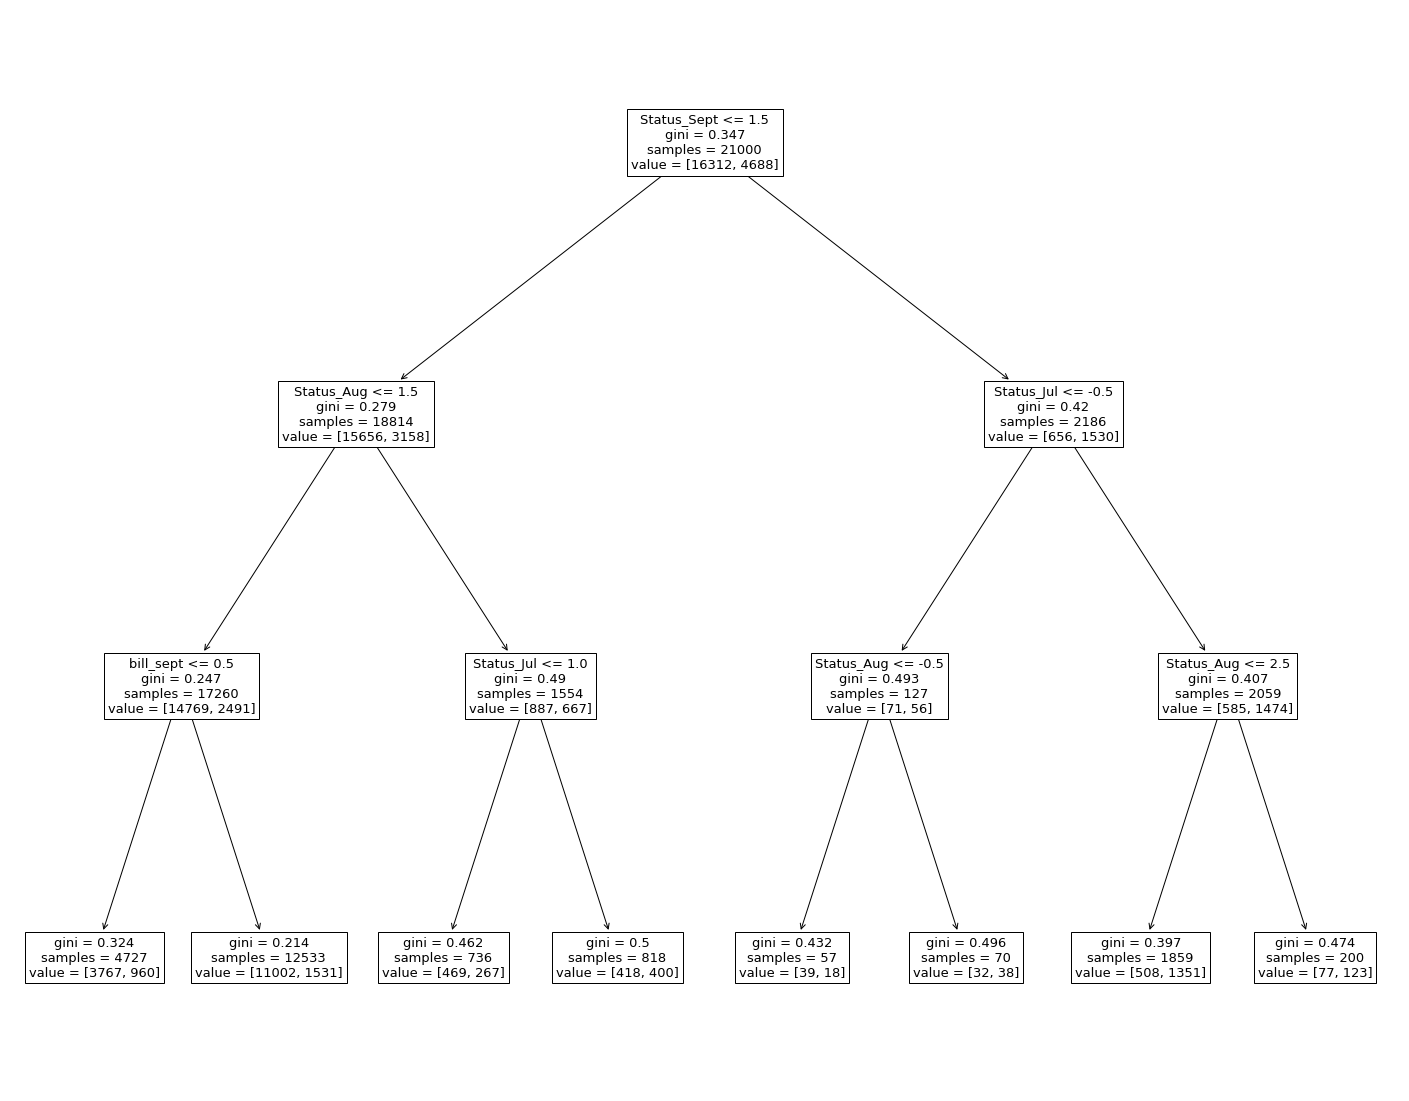

In [185]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dtc8, feature_names=X.columns, fontsize=13)